In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [45]:
DATADIR = 'dataset'
# CATEGORIES = ['1_normal','2_cataract','2_glaucoma','3_retina_disease']
CATEGORIES = ['1_normal','2_cataract']

dataset\1_normal
(1632, 2464, 3)


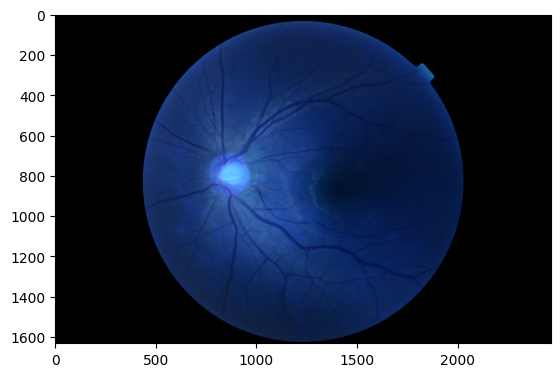

dataset\2_cataract
(1728, 2592, 3)


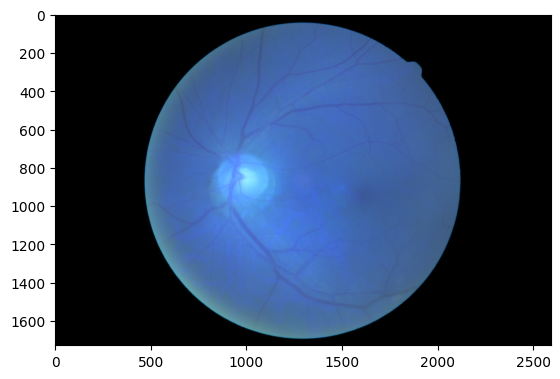

In [46]:
image = []
i = 0;
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    print(path)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        print(img_array.shape)
        image.append(img_array)
        plt.imshow(image[i])
        i += 1
        plt.show()
        break       

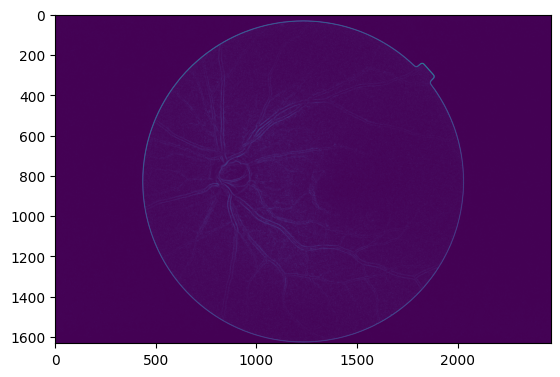

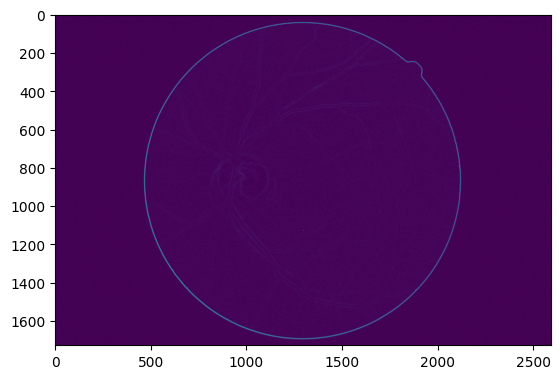

In [47]:
def sobelOperator(image) :
    # Load the image
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply the Sobel operator in the x-direction
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    # Apply the Sobel operator in the y-direction
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    # Calculate the magnitude of the gradient
    mag = np.sqrt(sobelx**2 + sobely**2)
    # Normalize the magnitude image to range 0-255
    mag = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    return mag

for i in range(0,len(image)) :
    im = sobelOperator(image[i])
    plt.imshow(im)
    plt.show()

In [48]:
IMG_SIZE = 500
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                img_array = sobelOperator(img_array)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [49]:
print(len(training_data))

400


In [50]:
lenofimage = len(training_data)

In [51]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

In [52]:
X.shape
X

array([[4, 0, 0, ..., 0, 1, 1],
       [0, 1, 2, ..., 0, 1, 0],
       [2, 1, 0, ..., 0, 0, 2],
       ...,
       [2, 0, 0, ..., 0, 2, 2],
       [0, 0, 1, ..., 0, 2, 1],
       [2, 2, 2, ..., 0, 1, 2]], dtype=uint8)

In [53]:
X = X/255
X

array([[0.01568627, 0.        , 0.        , ..., 0.        , 0.00392157,
        0.00392157],
       [0.        , 0.00392157, 0.00784314, ..., 0.        , 0.00392157,
        0.        ],
       [0.00784314, 0.00392157, 0.        , ..., 0.        , 0.        ,
        0.00784314],
       ...,
       [0.00784314, 0.        , 0.        , ..., 0.        , 0.00784314,
        0.00784314],
       [0.        , 0.        , 0.00392157, ..., 0.        , 0.00784314,
        0.00392157],
       [0.00784314, 0.00784314, 0.00784314, ..., 0.        , 0.00392157,
        0.00784314]])

In [54]:
X[1]

array([0.        , 0.00392157, 0.00784314, ..., 0.        , 0.00392157,
       0.        ])

In [55]:
y=np.array(y)

In [56]:
y.shape

(400,)

In [57]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15,random_state = 13)

In [74]:
from sklearn.svm import SVC
class_weights = {0: 1, 1: 2}
svc = SVC(C=2,kernel='linear',gamma = 'auto', class_weight=class_weights)
svc.fit(X_train, y_train)

SVC(C=2, class_weight={0: 1, 1: 2}, gamma='auto', kernel='linear')

In [75]:
y2 = svc.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score, recall_score
accuracy = accuracy_score(y_test, y2)
print("Accuracy on unknown data is", accuracy)
recall = recall_score(y_test, y2)
print("Recall on unknown data is", recall)

Accuracy on unknown data is 0.95
Recall on unknown data is 0.9411764705882353


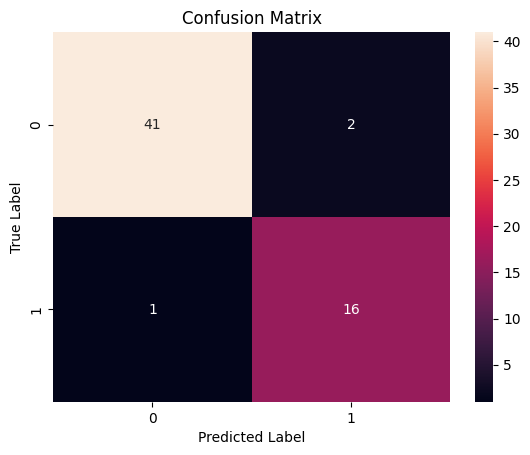

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y2)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [78]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.89      0.94      0.91        17

    accuracy                           0.95        60
   macro avg       0.93      0.95      0.94        60
weighted avg       0.95      0.95      0.95        60



In [79]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [80]:
result.tail(10)

,original,predicted
50,0,0
51,0,0
52,0,0
53,0,0
54,1,1
55,1,1
56,0,0
57,1,1
58,1,1
59,0,0
